In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("laptop.csv")

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
# lets drop unnecessary columns
df.drop(columns=["Unnamed: 0.1","Unnamed: 0"],inplace=True)

In [6]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
df.shape

(1303, 11)

In [8]:
# lets check duplicates in dataset
df.duplicated().sum()

np.int64(58)

In [9]:
df=df.drop_duplicates(keep='last')

In [10]:
# lets check for missing values
df.isnull().sum()

Company             1
TypeName            1
Inches              1
ScreenResolution    1
Cpu                 1
Ram                 1
Memory              1
Gpu                 1
OpSys               1
Weight              1
Price               1
dtype: int64

In [11]:
df["Weight"] = df["Weight"].replace({'?': None, 'N/A': None})
df["Weight"] = pd.to_numeric(df["Weight"].str.replace("kg", "", regex=False), errors='coerce')
df["Weight"] = df["Weight"].fillna(df["Weight"].median())

In [12]:
df["Inches"] = pd.to_numeric(df["Inches"], errors="coerce")

In [ ]:
# filling missing values
df["Company"] = df["Company"].fillna(df["Company"].mode()[0])
df["TypeName"] = df["TypeName"].fillna(df["TypeName"].mode()[0])
df["Inches"] = df["Inches"].fillna(df["Inches"].median())
df["ScreenResolution"] = df["ScreenResolution"].fillna(df["ScreenResolution"].mode()[0])
df["Cpu"] = df["Cpu"].fillna(df["Cpu"].mode()[0])
df["Ram"] = df["Ram"].fillna(df["Ram"].mode()[0])
df["Memory"] = df["Memory"].fillna(df["Memory"].mode()[0])
df["Gpu"] = df["Gpu"].fillna(df["Gpu"].mode()[0])
df["OpSys"] = df["OpSys"].fillna(df["OpSys"].mode()[0])
df["Gpu"] = df["Gpu"].fillna(df["Gpu"].mode()[0])
df["Weight"] = df["Weight"].fillna(df["Weight"].mode()[0])
df["Price"] = df["Price"].fillna(df["Price"].median())

In [14]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

<Axes: >

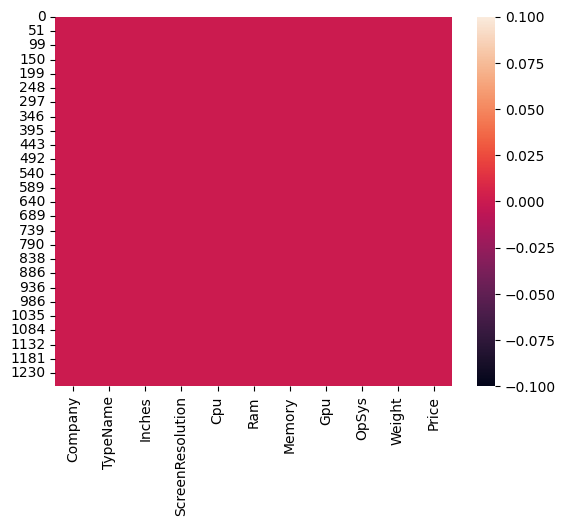

In [15]:
sns.heatmap(df.isnull())

In [16]:
# detect outliers
df.describe()

,Inches,Weight,Price
count,1245.000000,1245.000000,1245.000000
mean,15.139598,2.080169,60599.869162
std,1.965886,0.813416,37410.263158
min,10.100000,0.000200,9270.720000
25%,14.000000,1.500000,32660.640000
50%,15.600000,2.040000,52693.920000
75%,15.600000,2.330000,79813.440000
max,35.600000,11.100000,324954.720000


<Axes: ylabel='Inches'>

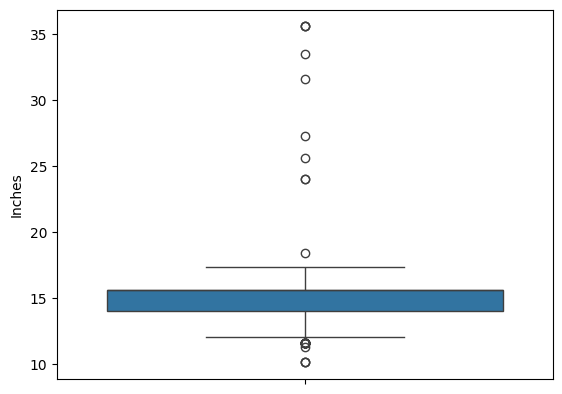

In [17]:
sns.boxplot(df["Inches"])

In [18]:
q1=int(df.describe()["Inches"]["25%"])
q3=int(df.describe()["Inches"]["75%"])
iqr = q3-q1
lower_limit= q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [19]:
new_df=df[(df["Inches"]<upper_limit) & (df["Inches"]>lower_limit)]

<Axes: ylabel='Inches'>

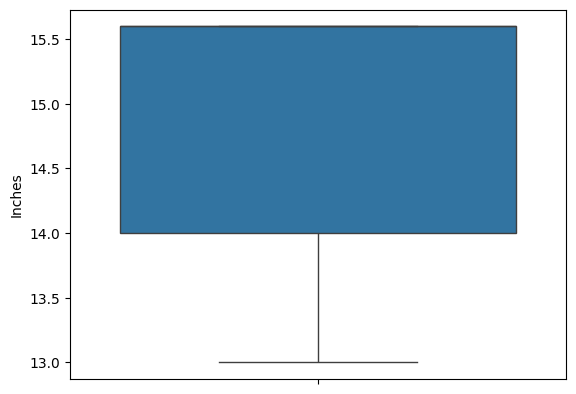

In [20]:
sns.boxplot(new_df["Inches"])

<Axes: ylabel='Weight'>

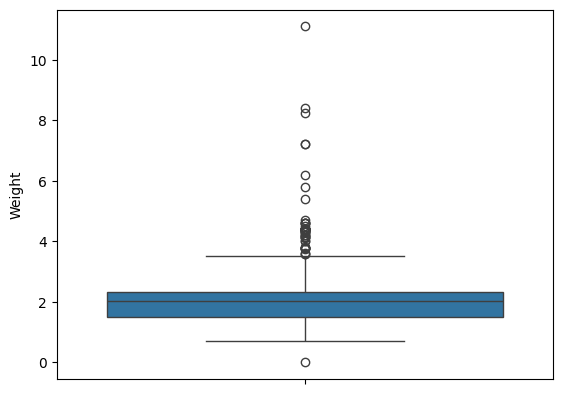

In [21]:
sns.boxplot(df["Weight"])

In [22]:
q1=df.describe()["Weight"]["25%"]
q3=df.describe()["Weight"]["75%"]
iqr = q3-q1
lower_limit= q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [23]:
df["Weight"]=df["Weight"].clip(lower_limit,upper_limit)

<Axes: ylabel='Weight'>

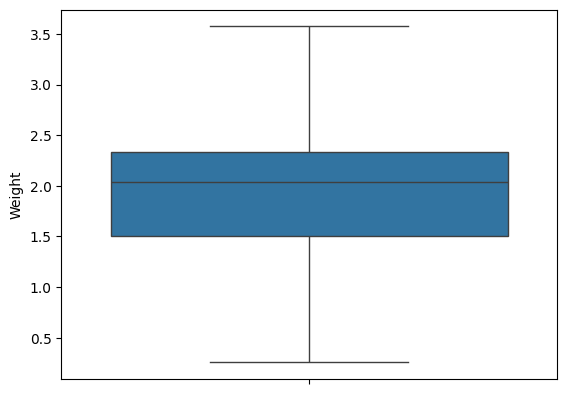

In [24]:
sns.boxplot(df["Weight"])

<Axes: ylabel='Price'>

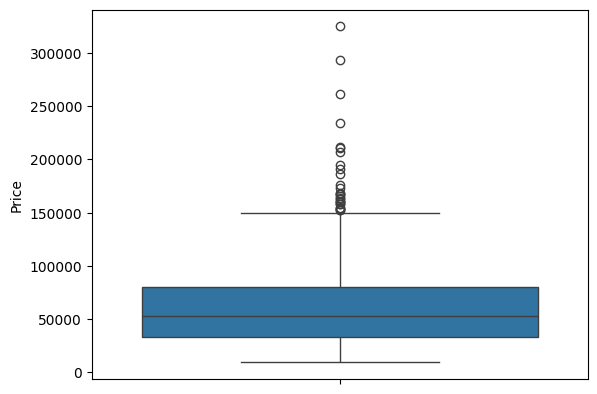

In [25]:
sns.boxplot(df["Price"])

In [26]:
q1=int(df.describe()["Price"]["25%"])
q3=int(df.describe()["Price"]["75%"])
iqr = q3-q1
lower_limit= q1-1.5*iqr
upper_limit=q3+1.5*iqr

In [27]:
df["Price"]=df["Price"].clip(lower_limit,upper_limit)

<Axes: ylabel='Price'>

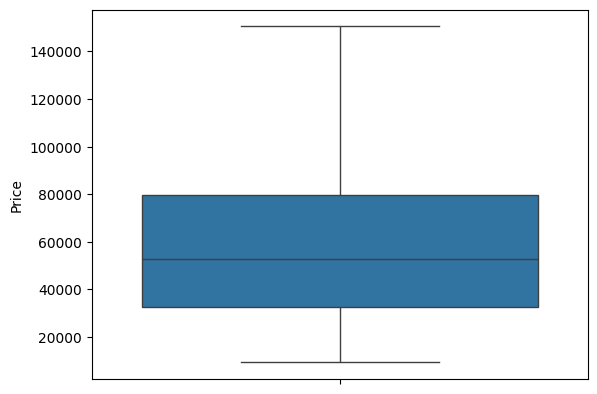

In [28]:
sns.boxplot(df["Price"])

## EDA

Text(0.5, 1.0, 'Top 10 Expensive Laptop Brands')

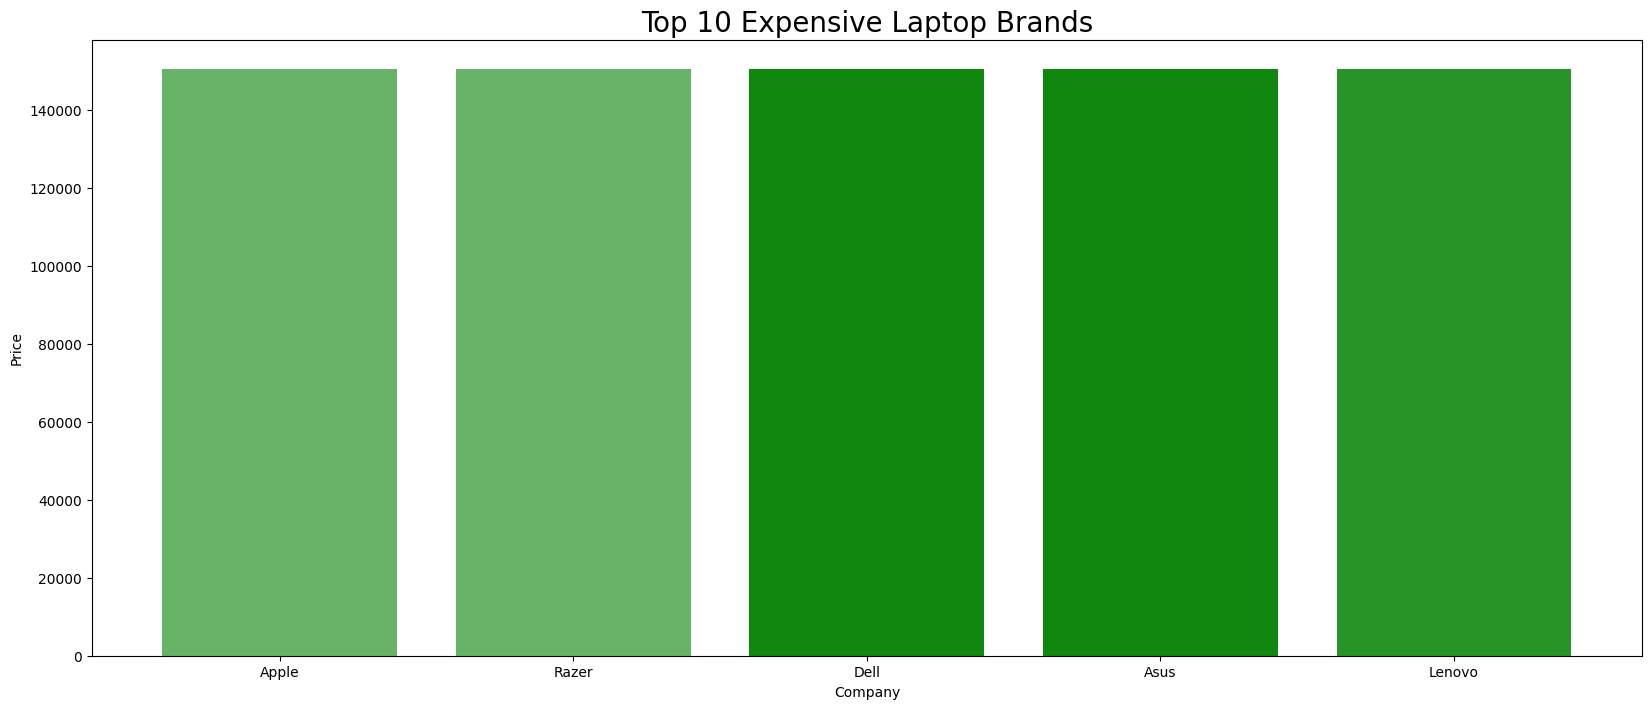

In [29]:
top10 = df.nlargest(10,'Price')
plt.figure(figsize=(20,8))
plt.bar(top10['Company'], top10['Price'],color='green',alpha=0.6)
plt.ylabel('Price', fontsize = 10)
plt.xlabel("Company", fontsize = 10)
plt.title("Top 10 Expensive Laptop Brands", fontsize = 20)

Text(0.5, 1.0, 'Top 10 Cheap Laptop Models')

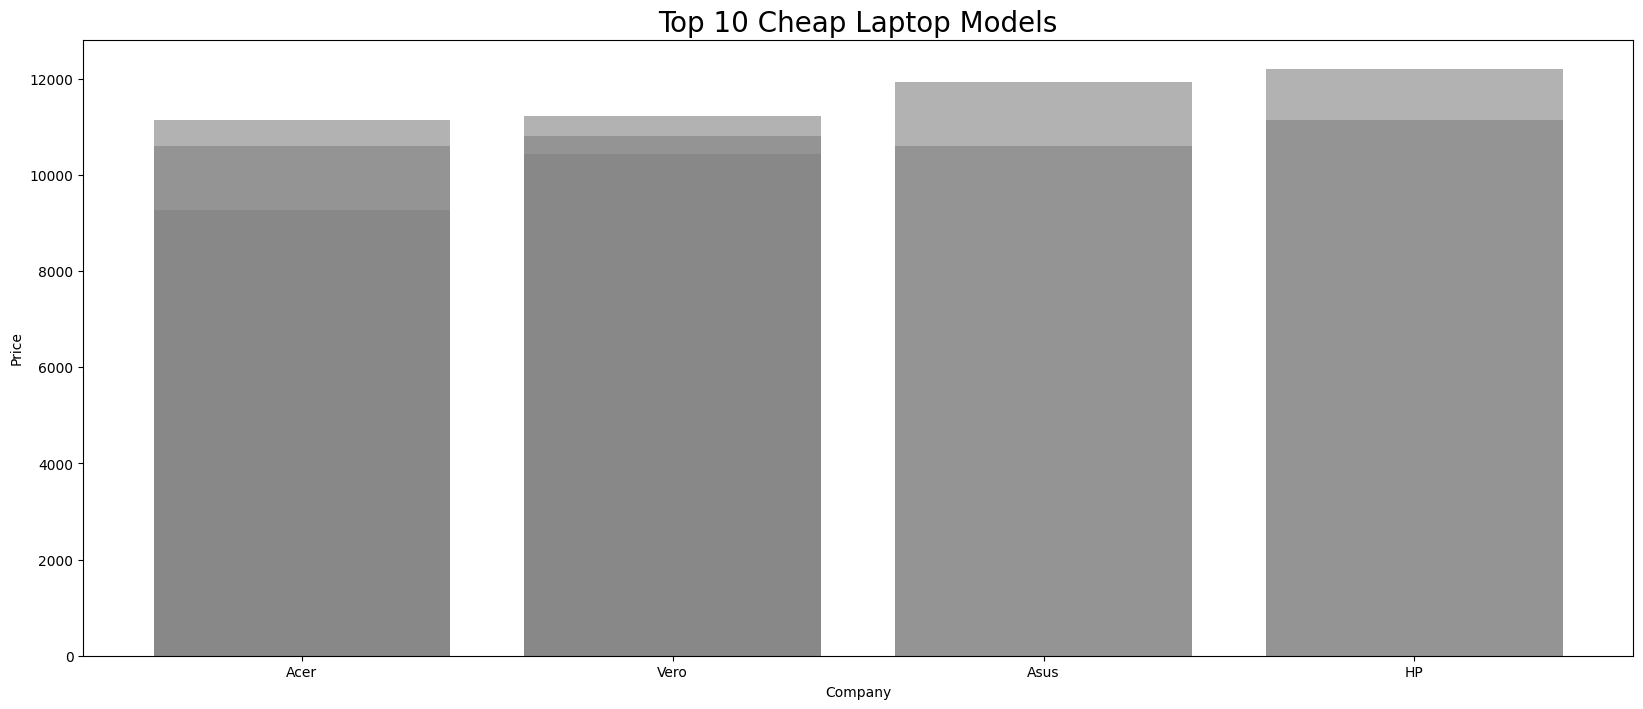

In [30]:
top10 = df.nsmallest(10,'Price')
plt.figure(figsize=(20,8))
plt.bar(top10['Company'], top10['Price'],color='grey',alpha=0.6)
plt.ylabel('Price', fontsize = 10)
plt.xlabel("Company", fontsize = 10)
plt.title("Top 10 Cheap Laptop Models", fontsize = 20)

<Axes: ylabel='count'>

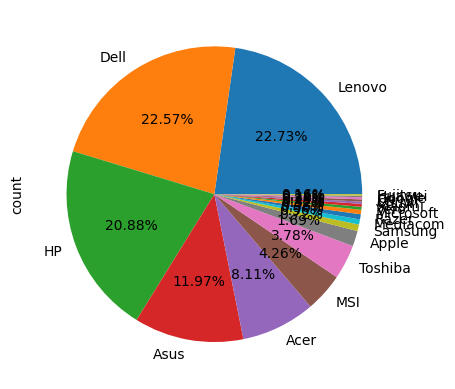

In [31]:
df["Company"].value_counts().plot(kind="pie",autopct="%.2f%%")

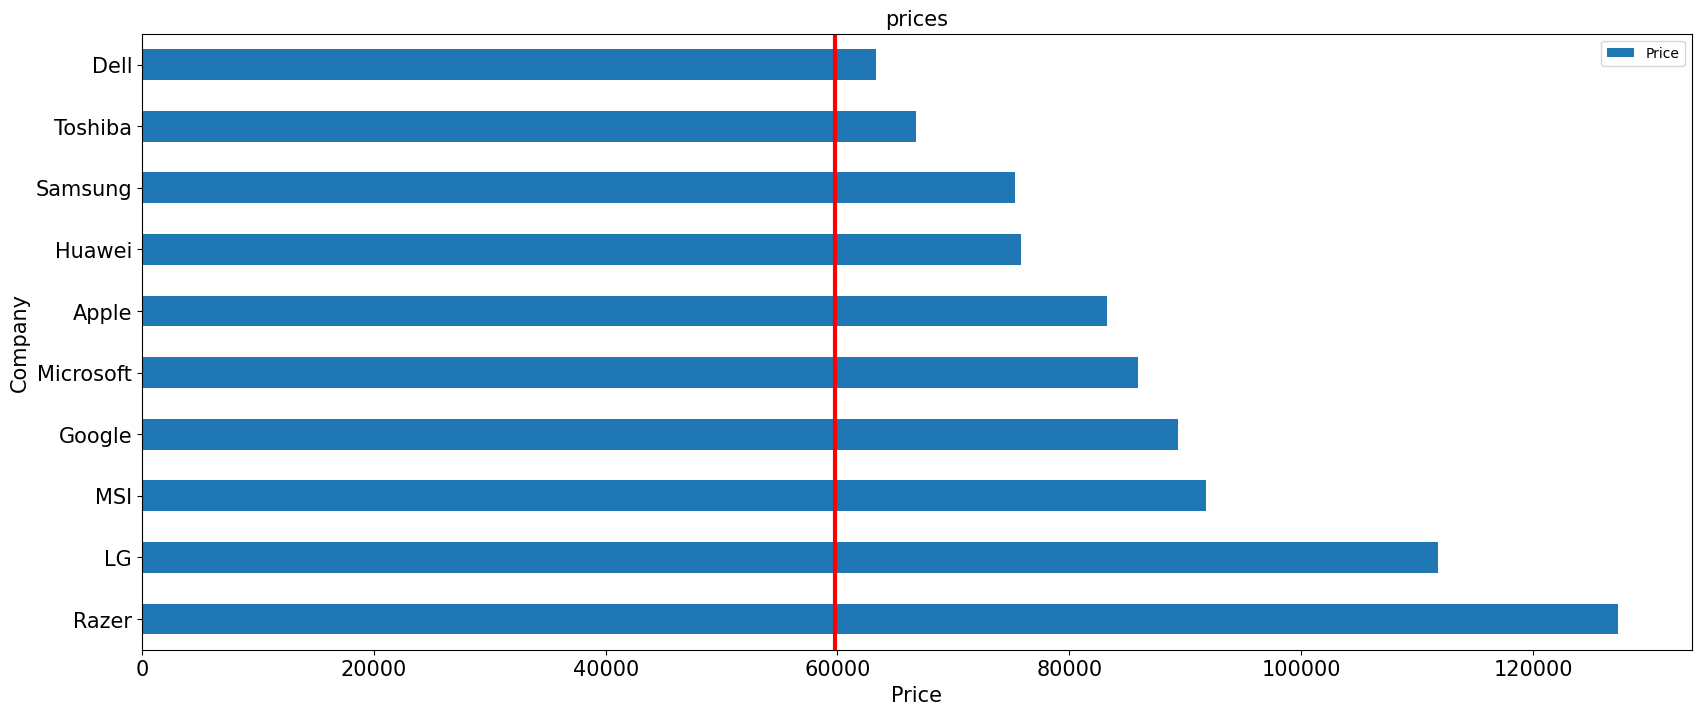

In [32]:
df[['Company','Price']].groupby('Company').mean().sort_values(by='Price', ascending = False).head(10).plot(kind = 'barh', figsize = (20,8), 
        fontsize = 15, rot =0)
plt.axvline(df['Price'].mean(), color='r', linestyle='solid', linewidth=3)
plt.xlabel('Price', fontsize = 15)
plt.ylabel('Company', fontsize = 15)
plt.title("prices", fontsize = 15)
plt.show()

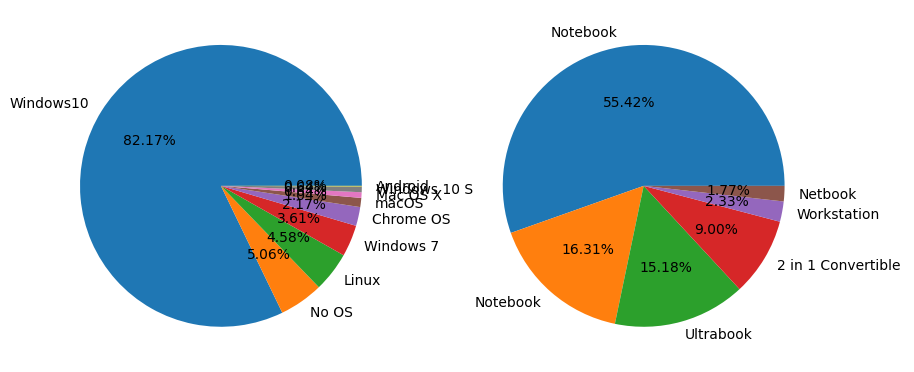

In [33]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pie(df["OpSys"].value_counts(), labels = ["Windows10","No OS","Linux","Windows 7","Chrome OS","macOS","Mac OS X","Windows 10 S","Android"],
        autopct = "%.2f%%")
plt.subplot(1,2,2)
plt.pie(df["TypeName"].value_counts(), labels = ["Notebook", "Notebook", "Ultrabook", "2 in 1 Convertible ", "Workstation", "Netbook"],
        autopct = "%.2f%%")

plt.show()
#

<Axes: xlabel='Company', ylabel='Price'>

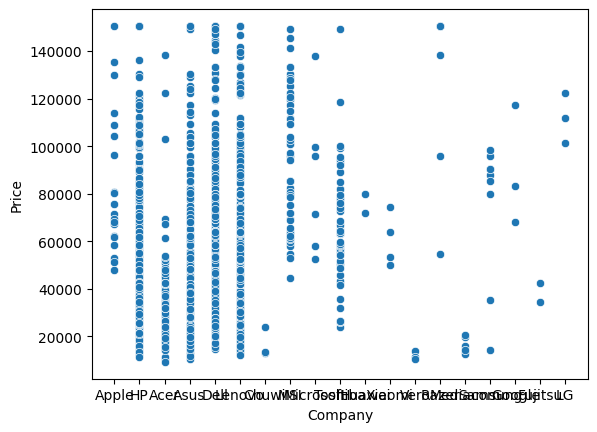

In [34]:
sns.scatterplot(data = df, x = "Company", y = "Price",) # bivariate analysis

<Axes: xlabel='Company', ylabel='Price'>

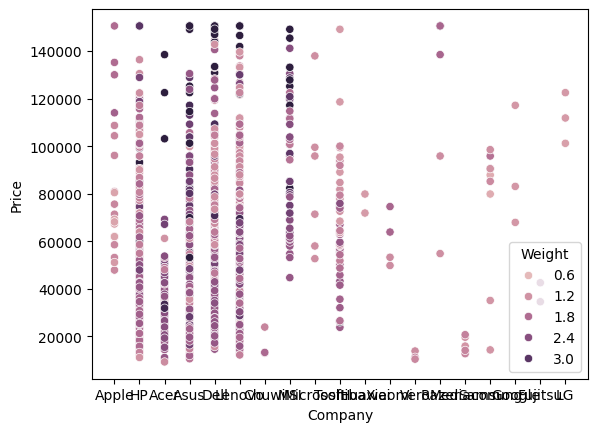

In [35]:
sns.scatterplot(data = df, x = "Company", y = "Price",hue="Weight") 

<Axes: xlabel='Company', ylabel='Price'>

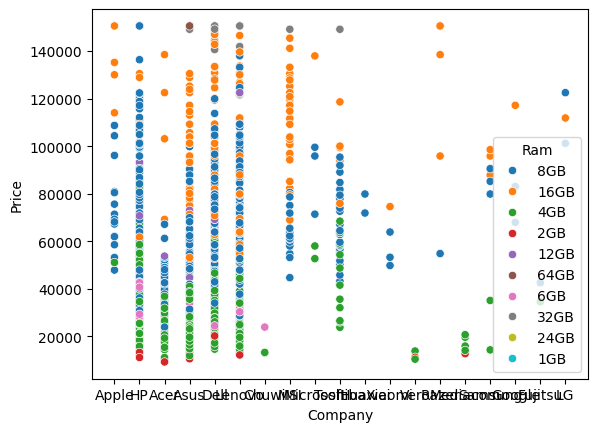

In [36]:
sns.scatterplot(data = df, x = "Company", y = "Price",hue="Ram") # multivariate analysis

<Axes: xlabel='Ram', ylabel='Company'>

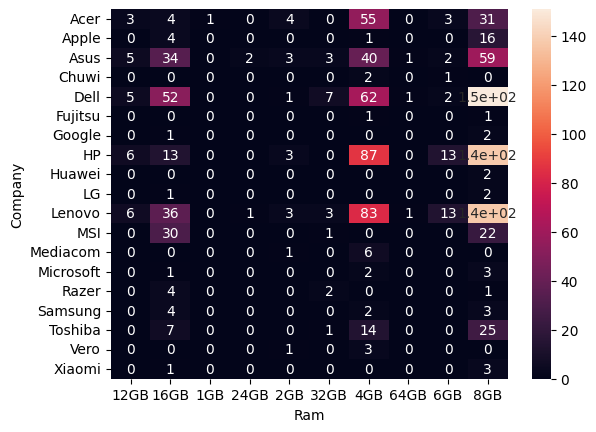

In [37]:
# crosstab with heatmap
import pandas as pd
sns.heatmap(pd.crosstab(df["Company"],df["Ram"]),annot=True)

<Axes: xlabel='Inches', ylabel='Company'>

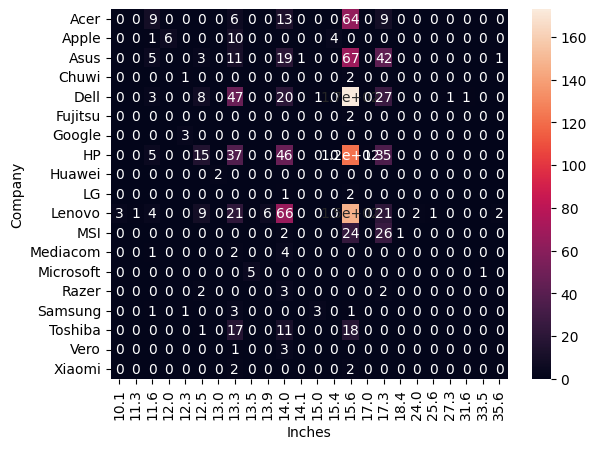

In [38]:
sns.heatmap(pd.crosstab(df["Company"],df["Inches"]),annot=True)

<Axes: xlabel='TypeName', ylabel='Company'>

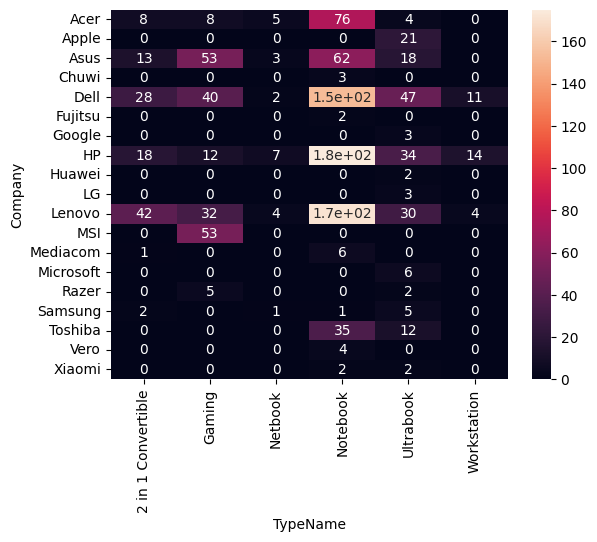

In [39]:
sns.heatmap(pd.crosstab(df["Company"],df["TypeName"]),annot=True)

## FEATURE ENGINEERING

In [40]:
# nominal columns
# Company,TypeName,# ScreenResolution , #Cpu , # Gpu , #OpSyS # Memory

In [41]:
# applying onehot coding using pd.get_dummies function on nominal columns 
df= pd.get_dummies(df,columns=["Company", "TypeName", "ScreenResolution", "Cpu", "Memory","Gpu", "OpSys"],dtype="int64",drop_first=True)

In [42]:
df.head()

,Inches,Ram,Weight,Price,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,...,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,13.3,8GB,1.37,71378.6832,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,13.3,8GB,1.34,47895.5232,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15.6,8GB,1.86,30636.0000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,15.4,16GB,1.83,135195.3360,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,13.3,8GB,1.37,96095.8080,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
# ordinal columns 
# RAm

In [44]:
# applying ordinal encoding using map function on ordinal columns
df["Ram"].value_counts()

d1 = {"1GB":1,"2GB":2,"4GB":4,"6GB":6,"8GB":8,"12GB":12,"16GB":16,"24GB":24,"32GB":32,"64GB":64}
df["Ram"]=df["Ram"].str.strip()
df["Ram"]=df["Ram"].map(d1)


In [45]:
# Target variable - #Price

In [46]:
# applying feature scaling using normalization and standardization
df_norm = df.copy()
df_stan = df.copy()

In [47]:
# Normalization 
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [48]:
scaled = mm.fit_transform(df_norm)

In [49]:
new_df_normalized=pd.DataFrame(scaled,columns=df_norm.columns)

In [50]:
new_df_normalized.head()

,Inches,Ram,Weight,Price,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,...,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,0.125490,0.111111,0.335843,0.439635,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.125490,0.111111,0.326807,0.273408,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.215686,0.111111,0.483434,0.151235,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.207843,0.238095,0.474398,0.891364,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.125490,0.111111,0.335843,0.614596,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
# standardiztion 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()


In [52]:
scaled1 = ss.fit_transform(df_stan)

In [53]:
new_df_standardized=pd.DataFrame(scaled1,columns=df_stan.columns)

In [54]:
new_df_standardized.head()

,Inches,Ram,Weight,Price,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,...,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,-0.936136,-0.094531,-1.074301,0.337159,7.634508,-0.368712,-0.049147,-0.539902,-0.040112,-0.049147,...,-0.0635,-0.028352,-0.148888,-0.219043,-0.080419,-0.230867,-2.14665,-0.080419,-0.193649,9.734949
1,-0.936136,-0.094531,-1.122995,-0.346098,7.634508,-0.368712,-0.049147,-0.539902,-0.040112,-0.049147,...,-0.0635,-0.028352,-0.148888,-0.219043,-0.080419,-0.230867,-2.14665,-0.080419,-0.193649,9.734949
2,0.234290,-0.094531,-0.278964,-0.848275,-0.130984,-0.368712,-0.049147,-0.539902,-0.040112,-0.049147,...,-0.0635,-0.028352,-0.148888,-0.219043,-0.080419,4.331501,-2.14665,-0.080419,-0.193649,-0.102723
3,0.132513,1.338542,-0.327658,2.193945,7.634508,-0.368712,-0.049147,-0.539902,-0.040112,-0.049147,...,-0.0635,-0.028352,-0.148888,-0.219043,-0.080419,-0.230867,-2.14665,-0.080419,-0.193649,9.734949
4,-0.936136,-0.094531,-1.074301,1.056320,7.634508,-0.368712,-0.049147,-0.539902,-0.040112,-0.049147,...,-0.0635,-0.028352,-0.148888,-0.219043,-0.080419,-0.230867,-2.14665,-0.080419,-0.193649,9.734949


## MODEL TRAINING AND EVALUATION

In [55]:
 #we have to separate X (independent)variables and y (dependent) variables
X = df.drop(columns= ["Price"])
y = df["Price"]

In [56]:
# split the data into 80 and 20
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (996, 338)
y_train shape: (996,)


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
y_train = y_train.loc[X_train.index]

In [60]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())

Inches                0
Ram                   0
Weight                0
Company_Apple         0
Company_Asus          0
                     ..
OpSys_No OS           0
OpSys_Windows 10      0
OpSys_Windows 10 S    0
OpSys_Windows 7       0
OpSys_macOS           0
Length: 338, dtype: int64
0


In [61]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression()

In [62]:
# testing
y_pred=linear.predict(X_test)

In [63]:
y_test

756      58554.72
453      71661.60
1145    101178.72
343     111834.72
337      60952.32
          ...    
948      35111.52
1173     21205.44
1088     32767.20
1220     81465.12
434     130482.72
Name: Price, Length: 249, dtype: float64

In [64]:
#evaluation
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)

In [65]:
np.sqrt(mse)

np.float64(120627374606918.33)

In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state=42) 
tree_model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = tree_model.predict(X_test)

In [70]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [71]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 334356789.02582943
R-squared: 0.7206934217378056


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [83]:
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor(random_state=42) 
rfmodel.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [84]:
y_pred = rfmodel.predict(X_test)

In [85]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [86]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 252472364.07887617
R-squared: 0.7890959764205944
